In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS
from sklearn.ensemble import RandomForestRegressor

In [6]:
data_tracks = pd.read_csv('C:/Users/asus/Desktop/spotify_data/data.csv')
data_tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
data_tracks.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [5]:
data_tracks.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


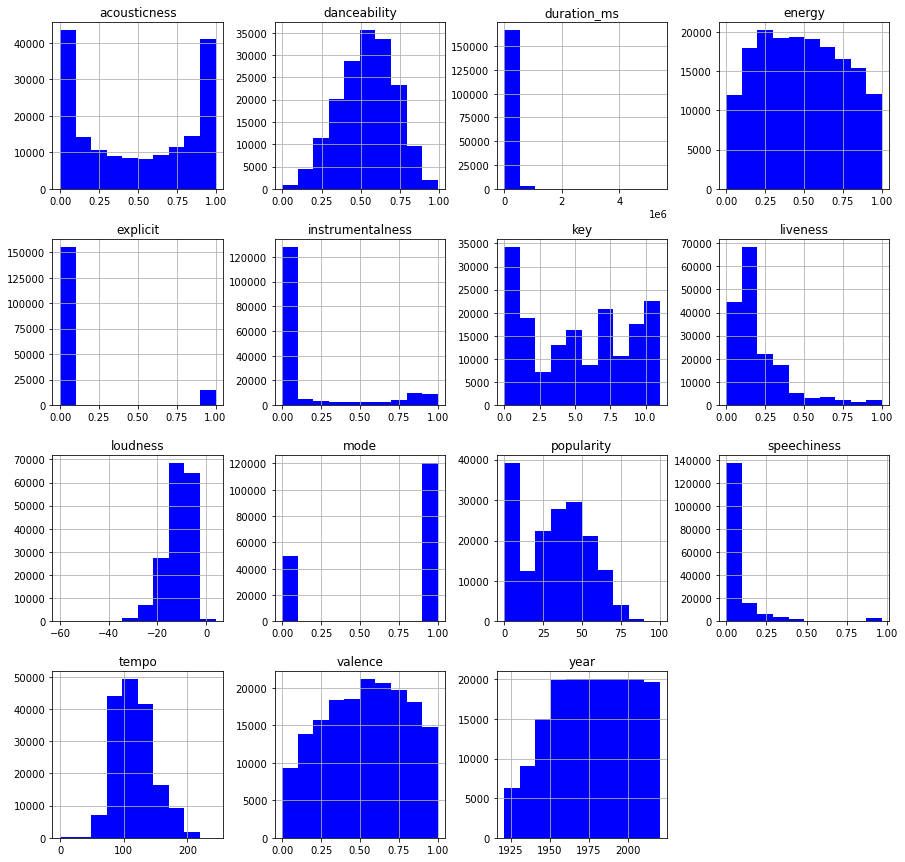

In [9]:
data_tracks.hist(figsize=(15, 15), color='blue')
plt.show()

<AxesSubplot:>

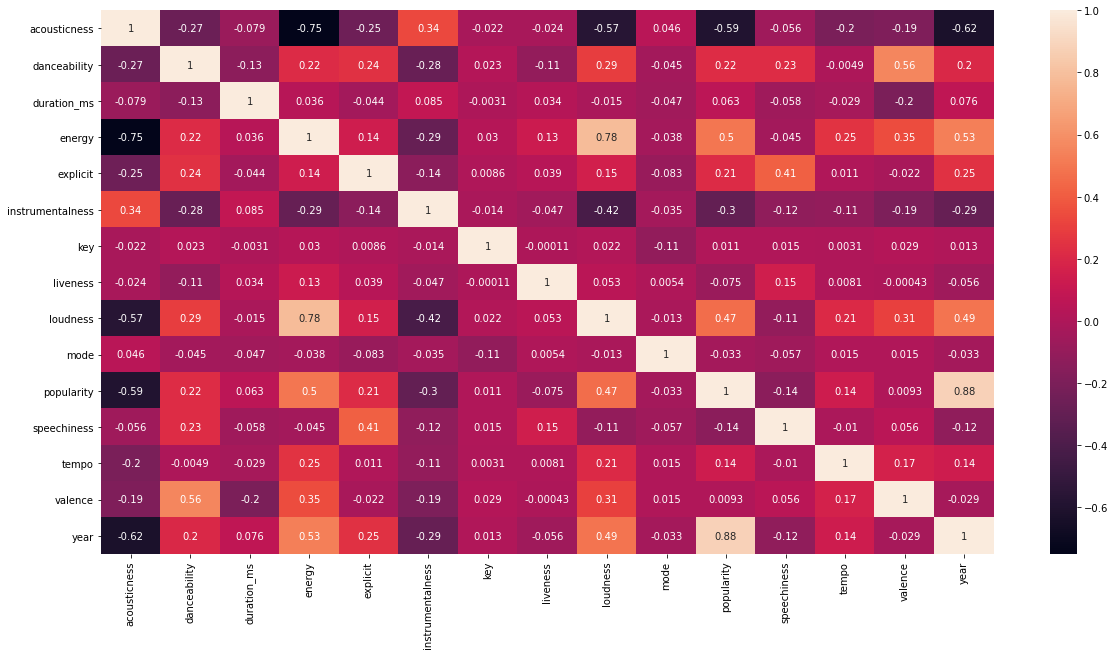

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data_tracks.corr(), annot=True)

# As the year, danceability, loudness, tempo and energy are important features for predicting popularity as per considering the heatmap so we need to find the correlation between these features one-by-one.

1--> First the correlation between year and popularity

<AxesSubplot:xlabel='year', ylabel='popularity'>

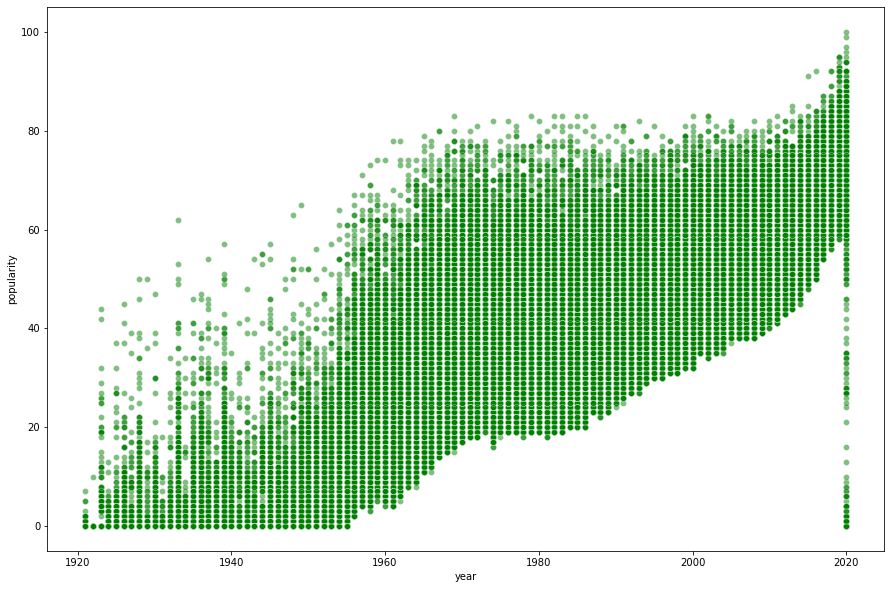

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year',y='popularity',data=data_tracks, alpha=0.5, color='green')

2--> Correlation between danceability and popularity

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

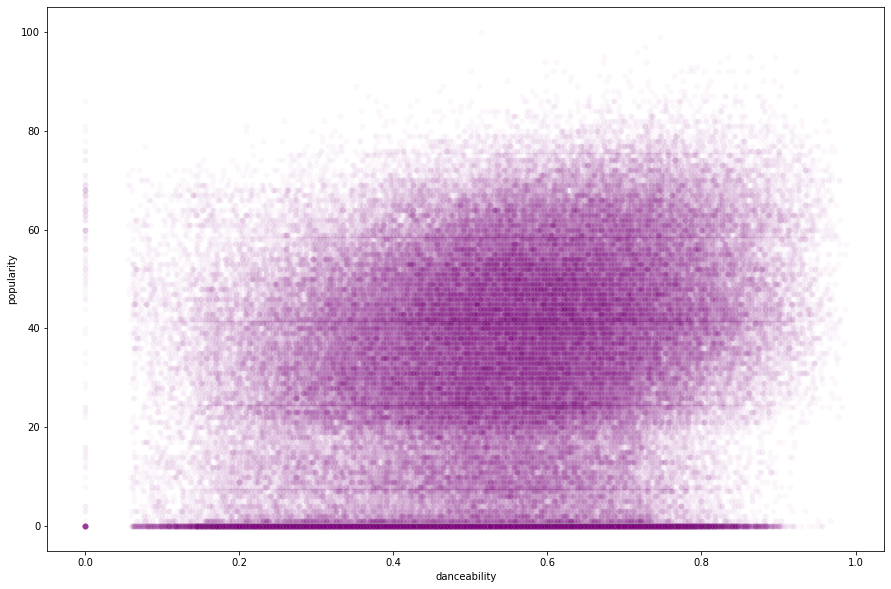

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='danceability',y='popularity', data=data_tracks, alpha=0.03, color='purple')

3--> Correlation between energy and popularity

<AxesSubplot:xlabel='energy', ylabel='popularity'>

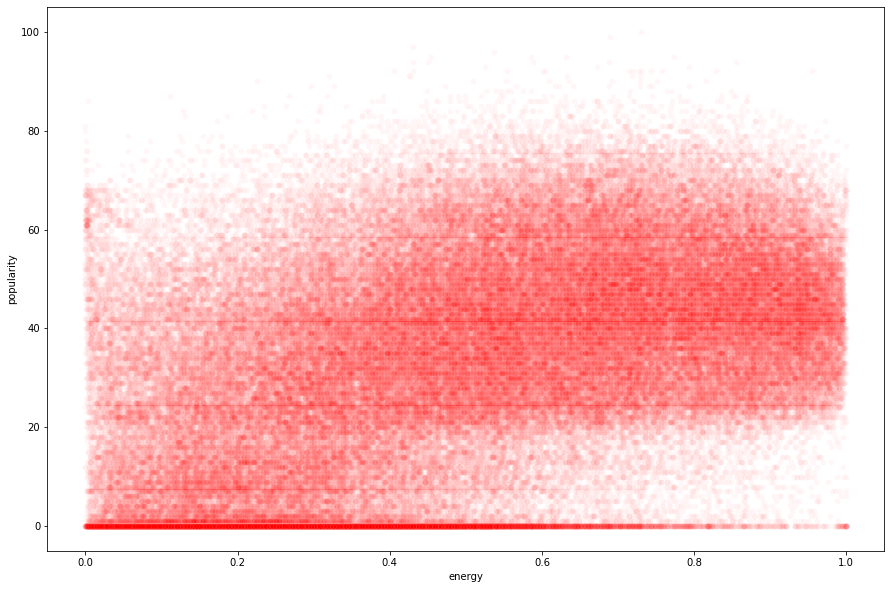

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='energy', y='popularity', data=data_tracks, alpha=0.03, color='red')

4-->Correlation between loudness and popularity 

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

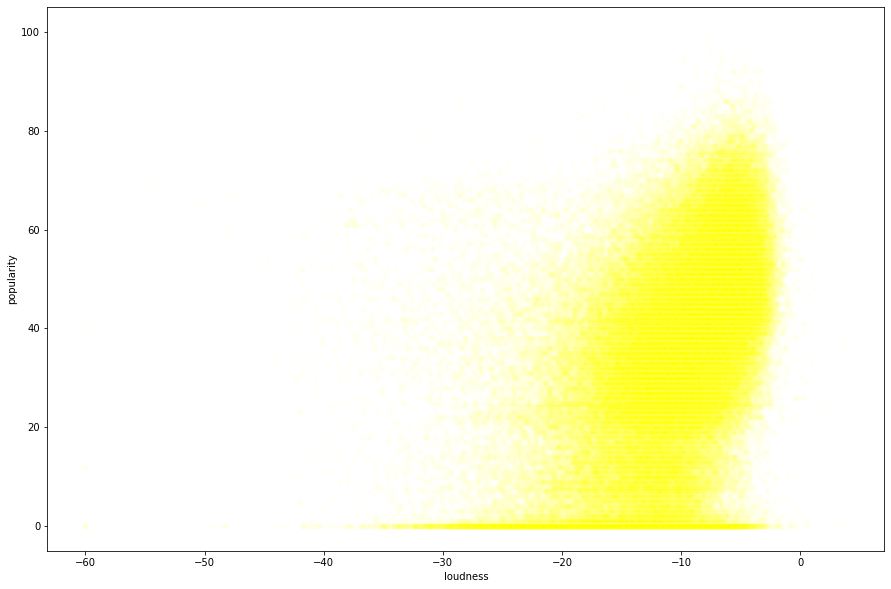

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='loudness',y='popularity',data=data_tracks, alpha=0.03,color='yellow')

5-->Correlation between tempo and popularity

<AxesSubplot:xlabel='tempo', ylabel='popularity'>

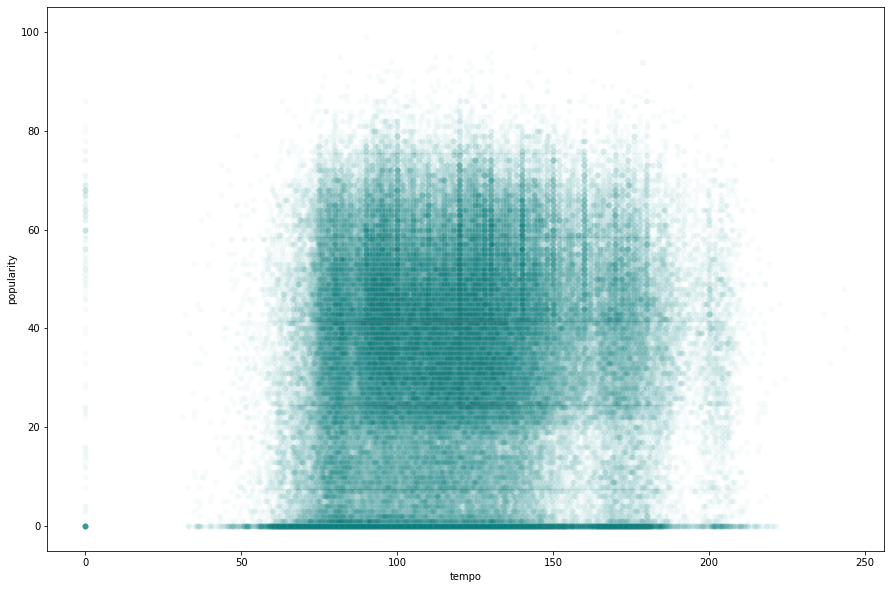

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='tempo',y='popularity',data=data_tracks, alpha=0.03, color='teal')

In [7]:
features = ['loudness','danceability','tempo','energy','year']
data_tracks = data_tracks.copy()
data_features = data_tracks[features]

In [21]:
class Artist:

    def __init__(self,name,popularity):
        self.name=name
        self.popularity=popularity
        

class Tracks:
    def __init__(self,name,artists,popularity):
        self.name=name
        self.artists=artists
        self.popularity=popularity
        
tracks=[]

names = data_tracks.name.values
artist_names = data_tracks.artists.values
popularity = data_tracks.popularity.values

for index in range(len(names)):
    track = Tracks(names[index],artist_names[index], popularity[index])
    tracks.append(track)
    
artists = []
artist_done = []
artist_popularities = []

for artists_str in tqdm(artist_names):
    artist_sublist = artists_str[1:-1].split(', ')
    pop_track = 0
    for artist in artist_sublist:
        if artist in artist_done:
            a = [x for x in artists if x.name==artist][0]
            pop_artist = a.popularity
        else:
            pop_songs = [x.popularity for x in tracks if artist in x.artists]
            pop_artist = sum(pop_songs)/len(pop_songs)
            artist_done.append(artist)
            a = Artist(artist, pop_artist)
            artists.append(a)
        pop_track += pop_artist
    pop_track /= len(artist_sublist)
    artist_popularities.append(pop_track)

artist_popularities = np.asarray(artist_popularities)
print(artist_popularities.max())


94.0


In [13]:
scaler = SS()
scaler.fit(data_features)
data_features = scaler.transform(data_features)
print(data_features.shape)
data_features = np.column_stack((artist_popularities/100, data_features))
print(data_features.shape)

a_data_tracks = data_tracks.popularity.values/100

X_train, X_test, y_train, y_test = train_test_split(data_features, a_data_tracks, test_size=0.2, random_state=1)

(169909, 6)
(169909, 7)


In [14]:
for column in range(X_train.shape[1]):
    print(X_train[:, column].min(), X_train[:, column].max())

0.0 0.94
-1.6168043985975005 3.185905654381946
-8.581590551706142 2.6867772179757763
-3.0690860912949542 2.5541053539277323
-3.8060533934124843 4.137846808677985
-1.827273610384251 1.912593974402537
-2.1968127400161213 1.6714185300685245


Using Random Forest Regressor

In [16]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
prediction = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Test_Accuracy: {:.4f}".format(accuracy*100))
avg_error = (abs(y_test - prediction)).mean()
print("{:.4f} average error".format(avg_error))

Test_Accuracy: 86.2221
0.0548 average error


In [18]:
for index in range(len(prediction[:100])):
    
    prediction_1 = prediction[index]
    actual = y_test[index]
    
    print("Actual/Predicted: {:.4f}/{:.4f}".format(actual,prediction_1))

Actual/Predicted: 0.2200/0.1965
Actual/Predicted: 0.0000/0.0152
Actual/Predicted: 0.6100/0.6382
Actual/Predicted: 0.5200/0.6325
Actual/Predicted: 0.4400/0.3910
Actual/Predicted: 0.0000/0.0000
Actual/Predicted: 0.4800/0.4221
Actual/Predicted: 0.5300/0.5010
Actual/Predicted: 0.0100/0.0161
Actual/Predicted: 0.0800/0.1509
Actual/Predicted: 0.0300/0.0075
Actual/Predicted: 0.3100/0.4043
Actual/Predicted: 0.2400/0.3503
Actual/Predicted: 0.0000/0.0035
Actual/Predicted: 0.5000/0.5250
Actual/Predicted: 0.2500/0.3721
Actual/Predicted: 0.4500/0.3733
Actual/Predicted: 0.6000/0.5902
Actual/Predicted: 0.3600/0.3362
Actual/Predicted: 0.0000/0.0000
Actual/Predicted: 0.6600/0.5862
Actual/Predicted: 0.4600/0.4405
Actual/Predicted: 0.0800/0.0951
Actual/Predicted: 0.5200/0.3844
Actual/Predicted: 0.0000/0.0028
Actual/Predicted: 0.5900/0.5729
Actual/Predicted: 0.4300/0.4228
Actual/Predicted: 0.0000/0.0013
Actual/Predicted: 0.5300/0.4445
Actual/Predicted: 0.5700/0.5579
Actual/Predicted: 0.6300/0.6586
Actual/P